In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [2]:
df18 = pd.read_csv('data/cleaned/df18_eda')

In [3]:
df18.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df18.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_tox_release,prev_traffic,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_lbw,pm_breakdown,dw_breakdown
0,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,0.255228,14.746087,44.23,519.882370,96414.458370,1217.535680,55.75,0.520,0,5.0,0.058025,top,Top
1,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,0.465401,13.888224,47.08,604.311803,8122.687693,1232.874128,49.00,1.845,5,2.0,0.063895,top,Top


## Baseline Model

### Categorical Features

In [5]:
#create dummy variables
cc_dummies = pd.get_dummies(df18['california_county'], prefix='cc', drop_first=True)
disadvantaged_dummies = pd.get_dummies(df18['sb_535_disadvantaged'], prefix='disadvantaged', drop_first=True)

df18 = pd.concat([df18, cc_dummies, disadvantaged_dummies], axis=1)

In [6]:
df18.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_tox_release,prev_traffic,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_lbw,pm_breakdown,dw_breakdown,cc_Alpine,cc_Amador,cc_Butte,cc_Calaveras,cc_Colusa,cc_Contra Costa,...,cc_Fresno,cc_Glenn,cc_Humboldt,cc_Imperial,cc_Inyo,cc_Kern,cc_Kings,cc_Lake,cc_Lassen,cc_Los Angeles,cc_Madera,cc_Marin,cc_Mariposa,cc_Mendocino,cc_Merced,cc_Modoc,cc_Mono,cc_Monterey,cc_Napa,cc_Nevada,cc_Orange,cc_Placer,cc_Plumas,cc_Riverside,cc_Sacramento,cc_San Benito,cc_San Bernardino,cc_San Diego,cc_San Francisco,cc_San Joaquin,cc_San Luis Obispo,cc_San Mateo,cc_Santa Barbara,cc_Santa Clara,cc_Santa Cruz,cc_Shasta,cc_Sierra,cc_Siskiyou,cc_Solano,cc_Sonoma,cc_Stanislaus,cc_Sutter,cc_Tehama,cc_Trinity,cc_Tulare,cc_Tuolumne,cc_Ventura,cc_Yolo,cc_Yuba,disadvantaged_Yes
0,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,0.255228,14.746087,44.23,519.882370,96414.458370,1217.535680,55.75,0.520,0,5.0,0.058025,top,Top,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,0.465401,13.888224,47.08,604.311803,8122.687693,1232.874128,49.00,1.845,5,2.0,0.063895,top,Top,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
df18.rename(columns = {'cc_Contra Costa': 'cc_Contra_Costa', 'cc_Los Angeles': 'cc_Los_Angeles', 
           'cc_Del Norte': 'cc_Del_Norte', 'cc_El Dorado': 'cc_El_Dorado',
           'cc_San Benito': 'cc_San_Benito', 'cc_San Bernardino': 'cc_San_Bernardino', 'cc_San Diego': 'cc_San_Diego', 
           'cc_San Francisco': 'cc_San_Francisco', 'cc_San Joaquin': 'cc_San_Joaquin', 'cc_San Luis Obispo': 'cc_SLO', 
           'cc_San Mateo': 'cc_San_Mateo', 'cc_Santa Barbara': 'cc_Santa_Barbara', 'cc_Santa Clara': 'cc_Santa_Clara', 
           'cc_Santa Cruz': 'cc_Santa_Cruz', 'cc_Tehama ': 'cc_Tehama'}, inplace = True)

In [8]:
df18.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_tox_release,prev_traffic,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_lbw,pm_breakdown,dw_breakdown,cc_Alpine,cc_Amador,cc_Butte,cc_Calaveras,cc_Colusa,cc_Contra_Costa,...,cc_Fresno,cc_Glenn,cc_Humboldt,cc_Imperial,cc_Inyo,cc_Kern,cc_Kings,cc_Lake,cc_Lassen,cc_Los_Angeles,cc_Madera,cc_Marin,cc_Mariposa,cc_Mendocino,cc_Merced,cc_Modoc,cc_Mono,cc_Monterey,cc_Napa,cc_Nevada,cc_Orange,cc_Placer,cc_Plumas,cc_Riverside,cc_Sacramento,cc_San_Benito,cc_San_Bernardino,cc_San_Diego,cc_San_Francisco,cc_San_Joaquin,cc_SLO,cc_San_Mateo,cc_Santa_Barbara,cc_Santa_Clara,cc_Santa_Cruz,cc_Shasta,cc_Sierra,cc_Siskiyou,cc_Solano,cc_Sonoma,cc_Stanislaus,cc_Sutter,cc_Tehama,cc_Trinity,cc_Tulare,cc_Tuolumne,cc_Ventura,cc_Yolo,cc_Yuba,disadvantaged_Yes
0,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,0.255228,14.746087,44.23,519.882370,96414.458370,1217.535680,55.75,0.520,0,5.0,0.058025,top,Top,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,0.465401,13.888224,47.08,604.311803,8122.687693,1232.874128,49.00,1.845,5,2.0,0.063895,top,Top,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Drop Columns

In [9]:
df18.drop(columns = ['california_county', 'sb_535_disadvantaged', 'pm_breakdown', 'dw_breakdown'], axis = 1, 
         inplace = True)

## Train Test Split

In [10]:
df18_features = df18.drop(columns = 'lbw', axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df18_features, 
                                                    df18['lbw'], 
                                                    random_state=20, 
                                                    test_size=0.2)

## Baseline Model

In [12]:
#fit to train data

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

In [13]:
#predict on train and test set
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

In [14]:
#give true value and predictions
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
df3_rmse = np.sqrt(mse)

In [15]:
print(mse)
print(df3_rmse)

0.7988475619875355
0.8937827263868638


In [16]:
#give true value and predictions
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
df3_test_rmse = np.sqrt(test_mse)

In [17]:
print(test_mse)
print(df3_test_rmse)

0.860141092490355
0.9274379184022804


### EVALUATE MODEL

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='lbw'>

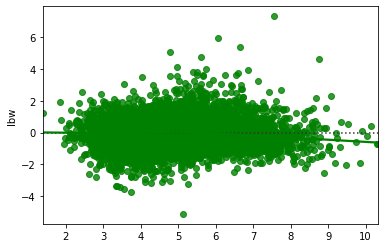

In [18]:
#Plot Residuals
sns.residplot(y_train_pred, y_train, lowess=True, color="g")

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


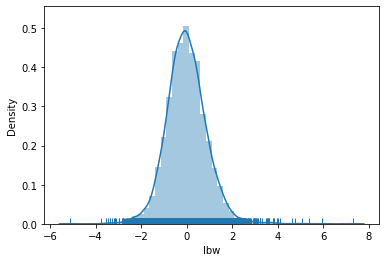

In [19]:
#Plot Residuals
residuals_2 =  y_train - y_train_pred
sns.distplot(residuals_2, kde=True, rug=True);

In [20]:
#Run Shapiro-Wilk test 
from scipy import stats
stats.shapiro(residuals_2)

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.979170024394989, pvalue=1.179593045716825e-29)

## Polynomials and Interactions

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from itertools import combinations

regression = LinearRegression()

X = df18.drop('lbw', axis=1)
y = df18['lbw']

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='neg_root_mean_squared_error', cv=crossvalidation))


interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='neg_root_mean_squared_error', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650


In [24]:
interactions

[('total_population', 'ozone', -0.912),
 ('total_population', 'pm2_5', -0.913),
 ('total_population', 'drinking_water', -0.912),
 ('total_population', 'pesticides', -0.913),
 ('total_population', 'cleanup_sites', -0.912),
 ('total_population', 'groundwater_threats', -0.913),
 ('total_population', 'imp_water_bodies', -0.913),
 ('total_population', 'education', -0.912),
 ('total_population', 'linguistic_isolation', -0.912),
 ('total_population', 'unemployment', -0.91),
 ('total_population', 'housing_burden', -0.912),
 ('total_population', 'Pop. Char. Score', -0.902),
 ('total_population', 'yrs_11_64', -0.912),
 ('total_population', 'hispanic', -0.912),
 ('total_population', 'white', -0.91),
 ('total_population', 'african_american', -0.91),
 ('total_population', 'native_american', -0.913),
 ('total_population', 'other', -0.913),
 ('total_population', 'prev_ozone', -0.912),
 ('total_population', 'prev_pm2_5', -0.912),
 ('total_population', 'prev_diesel_pm', -0.913),
 ('total_population', '

In [25]:
len(interactions)

2610

In [26]:
def create_interaction(i, dataframe, interactions):
    str_count = str(i)
    new_column = 'pi_' + str_count
    dataframe[new_column] = dataframe[interactions[i][0]] * dataframe[interactions[i][1]]

In [27]:
for i in range(0,len(interactions)):
    create_interaction(i, df18, interactions)

In [28]:
df18.head(2)

,total_population,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_tox_release,prev_traffic,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_lbw,cc_Alpine,cc_Amador,cc_Butte,cc_Calaveras,cc_Colusa,cc_Contra_Costa,cc_Del_Norte,cc_El_Dorado,cc_Fresno,cc_Glenn,...,pi_2560,pi_2561,pi_2562,pi_2563,pi_2564,pi_2565,pi_2566,pi_2567,pi_2568,pi_2569,pi_2570,pi_2571,pi_2572,pi_2573,pi_2574,pi_2575,pi_2576,pi_2577,pi_2578,pi_2579,pi_2580,pi_2581,pi_2582,pi_2583,pi_2584,pi_2585,pi_2586,pi_2587,pi_2588,pi_2589,pi_2590,pi_2591,pi_2592,pi_2593,pi_2594,pi_2595,pi_2596,pi_2597,pi_2598,pi_2599,pi_2600,pi_2601,pi_2602,pi_2603,pi_2604,pi_2605,pi_2606,pi_2607,pi_2608,pi_2609
0,3174,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,0.255228,14.746087,44.23,519.882370,96414.458370,1217.535680,55.75,0.520,0,5.0,0.058025,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6133,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,0.465401,13.888224,47.08,604.311803,8122.687693,1232.874128,49.00,1.845,5,2.0,0.063895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Add Polynomials and Interactions

In [22]:
df18_features = df18.drop(columns = 'lbw', axis = 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df18_features, 
                                                    df18['lbw'], 
                                                    random_state=20, 
                                                    test_size=0.2)

In [24]:
#fit to train data

#instantiate a linear regression object
lm_p_i = LinearRegression()

#fit the linear regression to the data
lm_p_i = lm_p_i.fit(X_train, y_train)

In [25]:
#predict on train and test set
y_train_pred_pi = lm_p_i.predict(X_train)

y_test_pred_pi = lm_p_i.predict(X_test)

In [26]:
#give true value and predictions
mae_pi = mean_absolute_error(y_train, y_train_pred_pi)
mse_pi = mean_squared_error(y_train, y_train_pred_pi)
rmse_pi = np.sqrt(mse_pi)

In [27]:
print(mse)
print(df3_rmse)
print(mse_pi)
print(rmse_pi)

0.7988475619875355
0.8937827263868638
0.7988475619875355
0.8937827263868638


In [28]:
#give true value and predictions
test_mae_pi = mean_absolute_error(y_test, y_test_pred_pi)
test_mse_pi = mean_squared_error(y_test, y_test_pred_pi)
test_rmse_pi = np.sqrt(test_mse_pi)

In [29]:
print(test_mse)
print(df3_test_rmse)
print(test_mse_pi)
print(test_rmse_pi)

0.860141092490355
0.9274379184022804
0.860141092490355
0.9274379184022804


## Select K Best

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

selector = SelectKBest(f_regression, k=60)

selector.fit(X_train, y_train)

SelectKBest(k=60, score_func=<function f_regression at 0x7faff7b31670>)

In [33]:
selector.get_support()

array([False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False, False,  True, False, False,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True, False,  True, False,
        True, False, False, False, False,  True, False, False,  True,
        True, False, False,  True,  True, False,  True])

In [34]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

#predict train
y_train_pred_kbest = lm_kbest.predict(X_train[selected_columns])

#give true value and predictions
mae_kbest = mean_absolute_error(y_train, y_train_pred_kbest)
mse_kbest = mean_squared_error(y_train, y_train_pred_kbest)
rmse_kbest = np.sqrt(mse_kbest)

print(mse)
print(df3_rmse)
print(mse_pi)
print(rmse_pi)
print(mse_kbest)
print(rmse_kbest)

0.7988475619875355
0.8937827263868638
0.7988475619875355
0.8937827263868638
0.8178597946615236
0.9043560110164158


In [35]:
#predict test
y_test_pred_kbest = lm_kbest.predict(X_test[selected_columns])

#give true value and predictions
test_mae_kbest = mean_absolute_error(y_test, y_test_pred_kbest)
test_mse_kbest = mean_squared_error(y_test, y_test_pred_kbest)
test_rmse_kbest = np.sqrt(test_mse_kbest)

In [36]:
print(test_mse)
print(df3_test_rmse)
print(test_mse_pi)
print(test_rmse_pi)
print(test_mse_kbest)
print(test_rmse_kbest)

0.860141092490355
0.9274379184022804
0.860141092490355
0.9274379184022804
0.8735721685967405
0.9346508270989442


## RFE

In [37]:
from sklearn.feature_selection import RFECV

In [38]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7,  scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train[selected_columns], y_train)

Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.


RFECV(cv=7, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_root_mean_squared_error', verbose=1)

In [39]:
#create variables for features selected for model and removed
selected_rfe = X_train[selected_columns].columns[selector.support_]
removed_rfe = X_train[selected_columns].columns[~selector.support_]

In [40]:
#check len
len(selected_rfe)

57

In [41]:
selected_rfe

Index(['ozone', 'pm2_5', 'diesel_pm', 'drinking_water', 'cleanup_sites',
       'haz_waste', 'imp_water_bodies', 'solid_waste',
       'pollution_burden_score', 'education', 'linguistic_isolation',
       'unemployment', 'housing_burden', 'Pop. Char. Score', 'less_10_yrs',
       'yrs_11_64', 'greater_65', 'hispanic', 'white', 'african_american',
       'native_american', 'asian_american', 'other', 'prev_ozone',
       'prev_pm2_5', 'prev_diesel_pm', 'prev_drinking_water', 'prev_haz_waste',
       'prev_imp_water_bodies', 'prev_lbw', 'cc_Butte ', 'cc_Contra_Costa',
       'cc_El_Dorado', 'cc_Fresno ', 'cc_Glenn ', 'cc_Humboldt ', 'cc_Kern ',
       'cc_Los_Angeles', 'cc_Marin ', 'cc_Mendocino ', 'cc_Monterey ',
       'cc_Nevada ', 'cc_Orange ', 'cc_Placer ', 'cc_San_Benito',
       'cc_San_Bernardino', 'cc_San_Diego', 'cc_San_Joaquin', 'cc_SLO',
       'cc_Santa_Barbara', 'cc_Santa_Cruz', 'cc_Sonoma ', 'cc_Tehama',
       'cc_Trinity ', 'cc_Ventura ', 'cc_Yolo ', 'disadvantaged_Yes'],

In [42]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

In [43]:
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])

In [44]:
#give true value and predictions
mse_rfe = mean_squared_error(y_train, y_train_pred_rfe)
rmse_rfe = np.sqrt(mse_rfe)

# print(mse)
print(df3_rmse)
# print(mse_pi)
print(rmse_pi)
# print(mse_kbest)
print(rmse_kbest)
# print(mse_rfe)
print(rmse_rfe)

0.8937827263868638
0.8937827263868638
0.9043560110164158
0.904743453834856


In [65]:
y_test_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

In [67]:
test_mse_rfe = mean_squared_error(y_test, y_test_pred_rfe)
test_rmse_rfe = np.sqrt(test_mse_rfe)

# print(test_mse)
print(df3_test_rmse)
# print(test_mse_pi)
print(test_rmse_pi)
# print(test_mse_kbest)
print(test_rmse_kbest)
# print(test_mse_rfe)
print(test_rmse_rfe)

0.9274379184022804
1.0297568898610667
0.8916387532525305
0.8916384459482573


In [72]:
df18['lbw'].describe()

count    8024.000000
mean        4.976329
std         1.530816
min         0.000000
25%         3.980000
50%         4.960000
75%         5.900000
max        14.890000
Name: lbw, dtype: float64

In [73]:
14.890000 - 0

14.89

In [74]:
0.8916384459482573 / 14.89

0.059881695496860794

## Clustering

In [76]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [77]:
X_train, y_train = make_blobs(n_features=2, centers=6, cluster_std=0.8)


In [79]:
k_means_3 = KMeans(n_clusters=3).fit(X_train)
k_means_4 = KMeans(n_clusters=4).fit(X_train)
k_means_5 = KMeans(n_clusters=5).fit(X_train)
k_means_6 = KMeans(n_clusters=6).fit(X_train)
k_means_7 = KMeans(n_clusters=7).fit(X_train)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [80]:
from sklearn.metrics import calinski_harabasz_score


In [81]:
CH_score = []

for model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(X_train, labels))

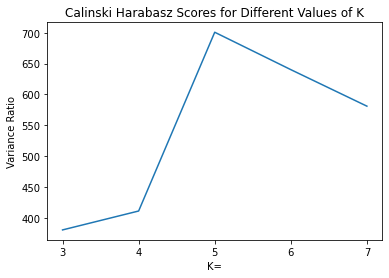

In [83]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [84]:
wcss_score = []

for model in k_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

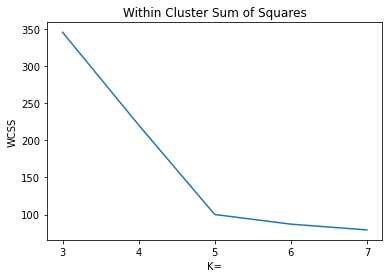

In [85]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

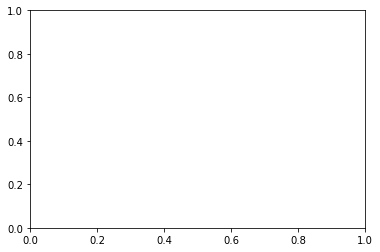

In [86]:
fig, ax = plt.subplots()
x = df18['cenesus_tract']
y1 = df18['lbw']
y2 = 